In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_excel(r"C:\Users\Praise\Downloads\customer transaction\Online Retail.xlsx")

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.shape

(541909, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

### Data Cleaning 

In [7]:
data = data.dropna(subset=["CustomerID"])

In [8]:
data = data.loc[~data['InvoiceNo'].astype(str).str.startswith('C')]    #create a variable, locates a data. Ensures it is a string (text) ...., 
#finds all invoices beginning with a "C". (~) negates the condition ((keeps only rows where the invoice does NOT start with "C")

In [9]:
data = data[(data["Quantity"] > 0) & (data["UnitPrice"] > 0)]     #Keeps only rows where Quantity > 0 And UnitPrice > 0. (Doesn't round up values)

### RFM Analysis (classic)
Recency = how recently a customer purchased.
Frequency = how often they purchase.
Monetary = how much they spend.

In [10]:
# Snapshot date = day after the latest InvoiceDate
snapshot_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)

# Group by CustomerID
rfm = data.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (snapshot_date - x.max()).days,  # Recency
    "InvoiceNo": "count",                                    # Frequency
    "Quantity": lambda x: (x * data.loc[x.index, "UnitPrice"]).sum()  # Monetary
})

# Rename columns
rfm.columns = ["Recency", "Frequency", "Monetary"]

print(rfm.head())


            Recency  Frequency  Monetary
CustomerID                              
12346.0         326          1  77183.60
12347.0           2        182   4310.00
12348.0          75         31   1797.24
12349.0          19         73   1757.55
12350.0         310         17    334.40


### Preprocessing

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(rfm)

C:\Users\Praise\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Praise\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Praise\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Praise\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Praise\anaconda3\Lib\site-packages\sklearn\

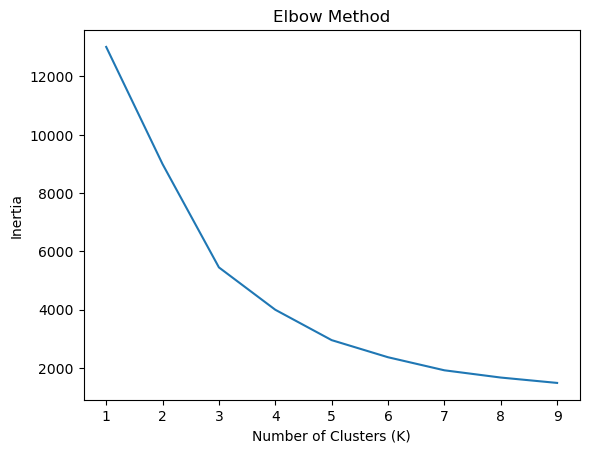

In [20]:
inertias = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,10), inertias)   #bo- means (b) blue color, (o) circle markers on each data point, (-) solid line connecting the points 
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [21]:
# inertias = []
# sil_scores = []

# for k in range(2, 10):  # start at 2 (1 cluster is meaningless)
#     kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
#     inertias.append(kmeans.inertia_)
#     sil_scores.append(silhouette_score(X, kmeans.labels_))

# # Elbow plot
# plt.plot(range(2, 10), inertias, 'bo-')
# plt.xlabel("Number of Clusters (K)")
# plt.ylabel("Inertia")
# plt.title("Elbow Method")
# plt.show()

# # Print silhouette scores
# for k, score in zip(range(2, 10), sil_scores):
#     print(f"K={k}, Silhouette Score={score:.3f}")


C:\Users\Praise\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


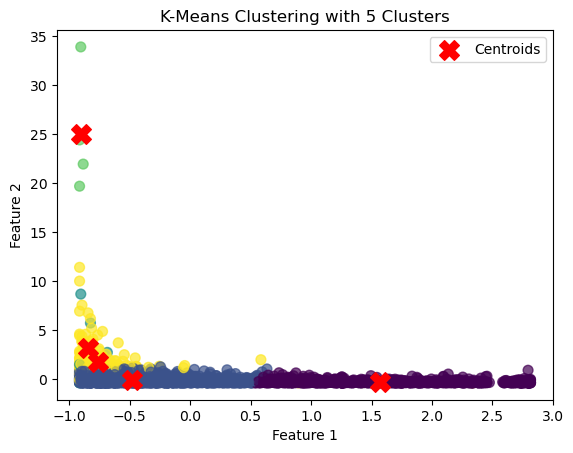

In [30]:
# Fit KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)
predicted_cluster_rfm = kmeans.fit_predict(X)

# Plot data points colored by their cluster
plt.scatter(X[:, 0], X[:, 1], c=predicted_cluster_rfm, s=50, alpha=0.7, cmap='viridis')

# Get and plot cluster centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label="Centroids")

plt.title("K-Means Clustering with 5 Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [31]:
rfm["Cluster"] = kmeans.predict(X)
rfm.head(20)

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,326,1,77183.60,4
12347.0,2,182,4310.00,1
12348.0,75,31,1797.24,1
12349.0,19,73,1757.55,1
12350.0,310,17,334.40,0
12352.0,36,85,2506.04,1
12353.0,204,4,89.00,0
12354.0,232,58,1079.40,0
12355.0,214,13,459.40,0


In [34]:
# Average RFM per cluster
cluster_summary = rfm.groupby("Cluster").mean()
cluster_summary

# Count customers per cluster
rfm["Cluster"].value_counts()

Cluster
1    3035
0    1055
4     238
2       6
3       4
Name: count, dtype: int64

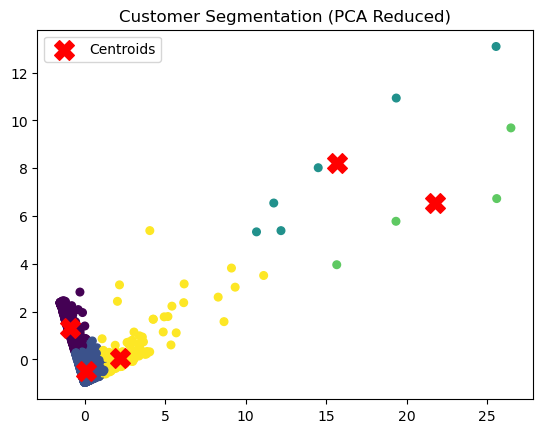

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X)

plt.scatter(reduced_X[:,0], reduced_X[:,1], c=rfm["Cluster"], cmap="viridis", s=30)
centers = pca.transform(kmeans.cluster_centers_)  # Project centroids to 2D
plt.scatter(centers[:,0], centers[:,1], c="red", s=200, marker="X", label="Centroids")
plt.title("Customer Segmentation (PCA Reduced)")
plt.legend()
plt.show()